In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
firstWeight = None
secondWeight = None
preNewFirstWeight = None
preNewSecondWeight = None

In [3]:
input_size = 4
hidden_size = 4
output_size = 1

preNewFirstWeight = None
preNewSecondWeight = None

learningrate = 0.5
momentum = 0.0

In [4]:
def initialize_weights():
    global firstWeight, secondWeight, input_size, hidden_size
    firstWeight = weightInitiailize(input_size + 1, 4)
    secondWeight = weightInitiailize(hidden_size + 1, 1)

In [5]:
# Initialize the weights with random numbers in [-1, 1]
def weightInitiailize(inputNum, outputNum):
    weight = np.zeros((inputNum, outputNum))
    for i in range(inputNum):
        for j in range(outputNum):
            weight[i][j] = np.random.uniform(-1, 1)
    return weight

In [6]:
# Initialize the input, the inputs are like [0, 0, 0, 0]
def initailInput():
    X = []
    for i in range(2):
        for j in range(2):
            for k in range(2):
                for l in range(2):
                    X.append([i, j, k, l])
    X = np.reshape(X, (len(X), len(X[0])))
    return X

In [7]:
# Return the output for each element in the input array
# The output is correspondingly whether the input array has an odd number of 1s
# For example, if the input is [1, 1, 0 , 1], the output is 1
def getOutput(input):
    row, col = input.shape
    res = np.zeros((row, 1))
    for i in range(row):
        num = 0
        for j in range(col):
            if input[i][j] == 1:
                num += 1
        if num % 2 == 1:
            res[i] = 1

    return res

In [34]:
#Logistic regression
def logisticRegression( x):
    return 1/ (1 + np.exp(-x))

# Derivative for logistic regression
def derivative(x):
    return logisticRegression(x) * (1 - logisticRegression(x))

In [23]:
def matrixFunction(input, func):
    row, col = input.shape
    result = np.zeros((row, col))
    for i in range(row):
        for j in range(col):
            result[i][j] = func(input[i][j])
    return result

In [24]:
#Add bias on the first column
def add_bias(input):
    row, col = input.shape
    bias = np.zeros((row, 1))
    for i in range(row):
        bias[i][0] = 1
    return np.concatenate((bias, input), axis = 1)

In [37]:
def training(input, output,learningRate):
    global firstWeight, secondWeight, momentum, preNewFirstWeight, preNewSecondWeight
    #Add bias, to obtain 1*5 vector
    firstInput = add_bias(input)

    # First layer
    firstDot = np.dot(firstInput, firstWeight)
    #1*4
    firstY = matrixFunction(firstDot, logisticRegression)
    #1*5
    secondInput = add_bias(firstY)
    # Second layer
    # 1*5 5*1
    secondDot = np.dot(secondInput, secondWeight)
    secondY = matrixFunction(secondDot, logisticRegression)

    secondDiff = output - secondY

    if abs(secondDiff) < 0.05:
        return secondDiff

    # back propagation
    # (1, 1)
    secondDelta = matrixFunction(secondDot, derivative) * secondDiff

    newSecondWeight = (learningRate * np.dot(secondDelta, secondInput)).T

    secondWeightNoBias = secondWeight[1:, 0:1]

    firstDiff = np.dot(secondWeightNoBias, secondDelta)

    firstDelta = matrixFunction(firstDot, derivative).T * firstDiff

    newFirstWeight = (learningRate * np.dot(firstDelta, firstInput)).T

    # Used for weights update with momentum

    if preNewFirstWeight is not None and preNewSecondWeight is not None:
        newFirstWeight = momentum * preNewFirstWeight + newFirstWeight
        newSecondWeight = momentum * preNewSecondWeight + newSecondWeight

    preNewFirstWeight = newFirstWeight
    preNewSecondWeight = newSecondWeight
    firstWeight = firstWeight + newFirstWeight
    secondWeight = secondWeight + newSecondWeight

    return secondDiff

In [26]:
def trainingCompleted(input, desiredOutput):
    inputRow, inputCol = input.shape
    for i in range(inputRow):
        predicted, diff = getOutputDiff(np.reshape(input[i], (1, len(input[i]))), np.reshape(desiredOutput[i], (1, len(desiredOutput[i]))))

        if abs(diff) > 0.05:
            return False
    return True

In [27]:
def getOutputDiff(input, output):
    global firstWeight, secondWeight
    firstInput = add_bias(input)
    firstDot = np.dot(firstInput, firstWeight)
    firstY = matrixFunction(firstDot, logisticRegression)

    secondInput = add_bias(firstY)
    secondDot = np.dot(secondInput, secondWeight)
    secondY = matrixFunction(secondDot, logisticRegression)
    return secondY, abs(output - secondY)

In [28]:
def cleanup():
    global preNewFirstWeight, preNewSecondWeight
    preNewFirstWeight = None
    preNewSecondWeight = None

In [47]:
def run(X, Y,learningRate, momentum = 0.0):
    global firstWeight, secondWeight
    print("lr:", learningRate)
    print("momentum:", momentum)
    initialize_weights()
    cleanup()
    learningRate = learningRate
    momentum = momentum
    learningRate = learningRate
    momentum = momentum
    epochs = 0
    loss_per_epoch = []
    while True:
        completed = False
        total_loss = 0
        for j in range (len(X)):
            curInput = np.reshape(X[j], (1, len(X[j])))
            curOutput = Y[j]
            diff = training(curInput, curOutput,learningrate)
            total_loss += np.abs(np.squeeze(diff))
            if trainingCompleted(X, Y):
                completed = True
                break
        epochs += 1
        loss = 0.5 * total_loss / 16
        loss_per_epoch.append(loss)
        if completed:
            break
    plt.plot(loss_per_epoch)
    plt.ylabel("errors")
    plt.xlabel("epoch")
    plt.show()
    print("total epochs= ", epochs)

In [43]:
X = initailInput()
Y = getOutput(X)

lr: 0.5
momentum: 0.0


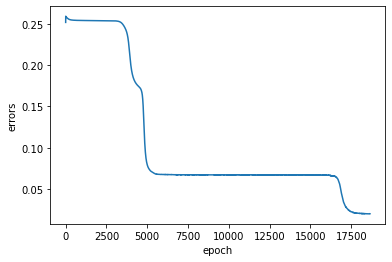

total epochs=  18656
lr: 0.45
momentum: 0.0


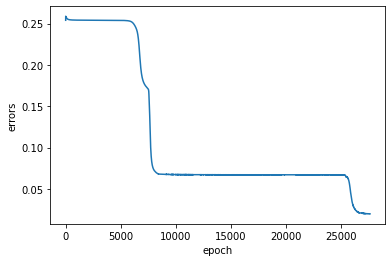

total epochs=  27646
lr: 0.4
momentum: 0.0


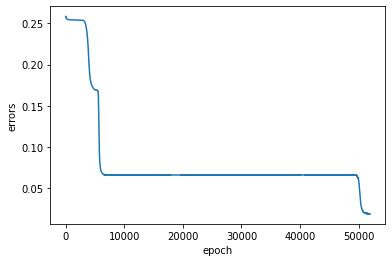

total epochs=  51940
lr: 0.35
momentum: 0.0


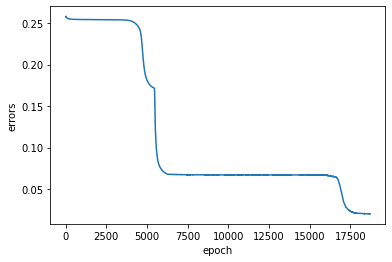

total epochs=  18716
lr: 0.3
momentum: 0.0


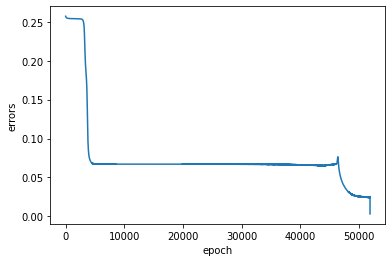

total epochs=  51912
lr: 0.25
momentum: 0.0


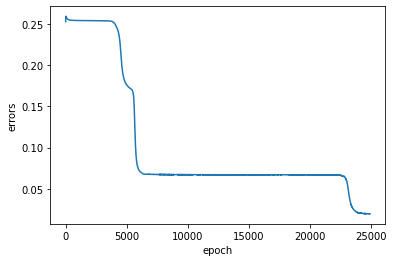

total epochs=  24952
lr: 0.2
momentum: 0.0


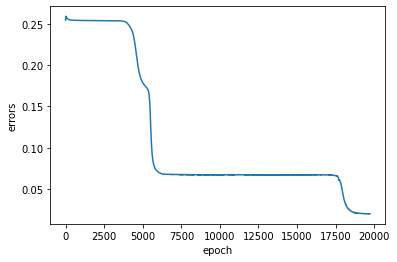

total epochs=  19733
lr: 0.15
momentum: 0.0


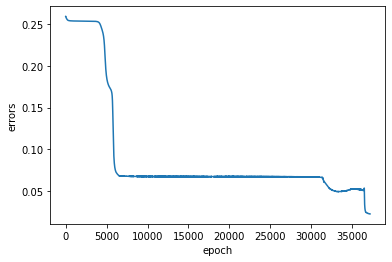

total epochs=  37187
lr: 0.1
momentum: 0.0


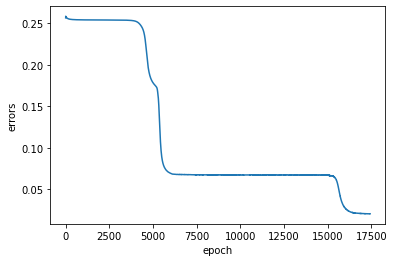

total epochs=  17420


In [ ]:
for lr in range(50, 5, -5):
  run(X, Y, lr/100, 0.0)

lr: 0.5
momentum: 0.9


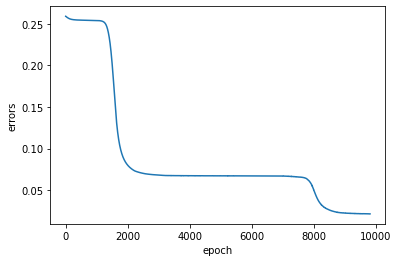

total epochs=  9815
lr: 0.45
momentum: 0.9


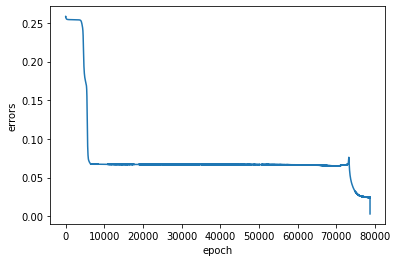

total epochs=  78709
lr: 0.4
momentum: 0.9


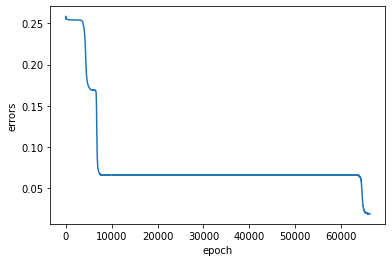

total epochs=  66277
lr: 0.35
momentum: 0.9


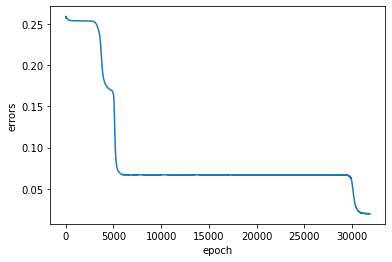

total epochs=  31888
lr: 0.3
momentum: 0.9


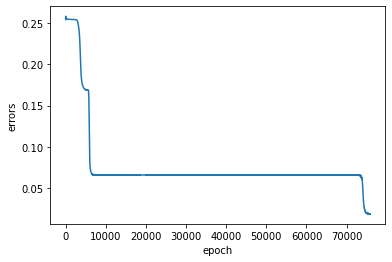

total epochs=  75830
lr: 0.25
momentum: 0.9


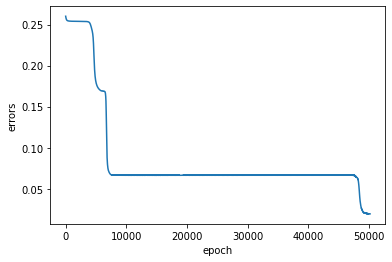

total epochs=  50137
lr: 0.2
momentum: 0.9


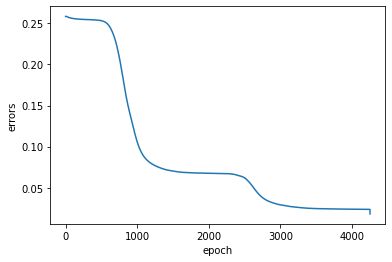

total epochs=  4253
lr: 0.15
momentum: 0.9


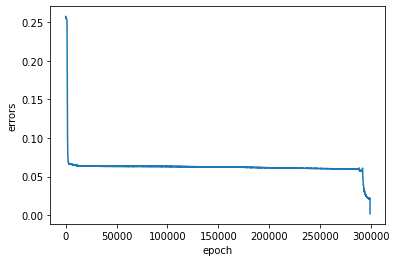

total epochs=  298953
lr: 0.1
momentum: 0.9


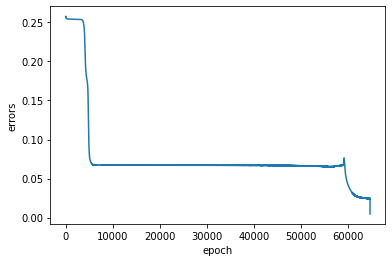

total epochs=  64729


In [ ]:
for lr in range(50, 5, -5):
  run(X, Y, lr/100, 0.9)